In [27]:
import warnings
warnings.filterwarnings('ignore')
import pyodbc
from functools import reduce
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn import linear_model

import math
from datetime import date
import statistics
import seaborn as sb

import seaborn as sns
%matplotlib inline
import scipy as sp
from scipy import stats
import statsmodels

import xgboost as xgb
from pandas import Series
from pandas import read_csv
import scipy.stats.stats as stats
import re
import traceback
import string

import pickle

import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

import scipy as sp
from scipy import stats


from matplotlib import pyplot
import matplotlib.animation as animation

from statsmodels.graphics.tsaplots import plot_acf
import statsmodels
import pandas.core.algorithms as algos
from statsmodels.stats.outliers_influence import variance_inflation_factor

plt.rcParams["figure.figsize"] = (30,6)
plt.rcParams['axes.grid'] = True

In [ ]:
import pyodbc
server = 'frydai.database.windows.net'
database = 'frydai_db'
username = 'DABI_readonly'
password = 'dbLOGIN_22!{Mar).' 
driver= '{SQL Server Native Client 11.0}'
with pyodbc.connect('DRIVER='+driver+';SERVER=tcp:'+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password) as conn:
    with conn.cursor() as cursor:
        for row in cursor.tables():
            print(row.table_name)

In [ ]:
# Data Extraction
admissions_data = pd.read_sql('SELECT * From admissions', conn)
diagnosis_data = pd.read_sql('SELECT * From diagnosis', conn)
patients_data = pd.read_sql('SELECT * From patients', conn)
conn.close()

In [ ]:
# extracted data writing to CSV file
admissions_data.to_csv("D:/assignment/Dissertation/data/admissions.csv")
diagnosis_data.to_csv("D:/assignment/Dissertation/data/diagnosis.csv")
patients_data.to_csv("D:/assignment/Dissertation/data/patients.csv")

In [ ]:
# Reading and storing the CSV data in data frame.
df = pd.read_csv('D:/assignment/Dissertation/data/admissions.csv')
df1 = pd.read_csv('D:/assignment/Dissertation/data/diagnosis.csv')
df2 = pd.read_csv('D:/assignment/Dissertation/data/patients.csv')

In [ ]:
print(df.columns.values)
print(df1.columns.values)
print(df2.columns.values)

In [28]:
#reading all Three csv files and merged into single Csv file based on the patient id.
df = pd.read_csv('admissions.csv')
df1 = pd.read_csv('diagnosis.csv')
df2 = pd.read_csv('patients.csv')

df_t = reduce(lambda x,y: pd.merge(x,y, on='PATIENT_ID', how='outer'), [df, df1, df2])
df_t = df_t.iloc[:,1:]
df_t = df_t.drop(['Unnamed: 0_y'], axis = 1)
df_t = df_t.drop(['Unnamed: 0'], axis = 1)
df_t

,PATIENT_ID,Presentation with a hip fracture via A&E,Presentation to A&E or Trauma Team,Admission to OW,Admission to OW date,Residence before admission,Pre-fracture mobility,AMTS pre-op,Nutritional assessment,Delirium Assessment Not Done,...,Diag9Desc,Diag10,Diag10Desc,HOSPITAL_ID,SEX,BIRTH_DATE,DEATH_DATE,CIVIL_STATUS,ETHNICITY,NEXT_OF_KIN
0,87143.0,NaN,2021-03-04 00:00:00,Yes,2021-03-04 00:00:00,Own home/sheltered housing,Freely mobile without aids,10.0,Yes - assessment indicates normal,NaN,...,NaN,NaN,NaN,837073.0,Male,1939-09-17,NaN,Married/Civil Partnership,White British,Wife
1,525743.0,Yes,2013-01-23 16:13:00,NaN,2013-01-23 19:00:00,Residential care,Regularly walked without aids,9.0,NaN,NaN,...,NaN,NaN,NaN,67737.0,Female,1926-10-10,NaN,Married/Civil Partnership,Any other White background,Son
2,341769.0,Yes,2015-06-24 18:20:00,Yes,2015-06-24 21:24:00,Nursing care,Freely mobile without aids,5.0,NaN,NaN,...,NaN,NaN,NaN,649881.0,Female,1916-10-12,2015-08-21,Married/Civil Partnership,White British,Relative
3,171419.0,Yes,2012-12-04 18:32:00,NaN,2012-12-04 21:45:00,Own home/sheltered housing,Regularly walked with two aids or frame,10.0,NaN,NaN,...,NaN,NaN,NaN,69892.0,Female,1924-05-24,2017-03-22,Widowed/Surviving Civil Partner,White British,Son
4,395925.0,Yes,2015-04-30 16:50:00,Yes,2015-04-30 20:00:00,Own home/sheltered housing,Freely mobile without aids,10.0,NaN,NaN,...,NaN,NaN,NaN,51868.0,Female,1936-05-04,NaN,Married/Civil Partnership,White British,Husband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,362562.0,Yes,2019-01-15 20:25:00,Yes,2019-01-16 02:00:00,Own home/sheltered housing,Some indoor mobility but never goes outside wi...,1.0,No,NaN,...,NaN,NaN,NaN,NaN,Male,1937-02-20,NaN,Married/Civil Partnership,White British,Wife
2683,575805.0,Yes,2018-05-02 04:39:00,Yes,2018-05-02 07:25:00,Residential care,Some indoor mobility but never goes outside wi...,8.0,Yes - assessment indicates normal,NaN,...,NaN,NaN,NaN,NaN,Female,1943-12-05,2018-12-02,Married/Civil Partnership,White British,Husband
2684,495704.0,Yes,2015-08-01 21:38:00,Yes,2015-08-02 00:55:00,Own home/sheltered housing,Mobile outdoors with one aid,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,1942-08-13,2021-05-04,Married/Civil Partnership,White British,Husband
2685,587672.0,No - already inpatient on this hospital site,2017-11-30 18:20:00,Yes,2017-12-01 12:55:00,Own home/sheltered housing,Unknown,NaN,Yes - assessment indicates normal,NaN,...,NaN,NaN,NaN,NaN,Female,1930-05-01,NaN,Married/Civil Partnership,White British,Daughter


In [29]:
# Checking for duplicate patient id
if len(df_t["PATIENT_ID"]) == len(set(df_t["PATIENT_ID"])):
  print("True")

#  From this refernce, We prove that all patient Id are unique.

True


# **Description about columns**

*   **PATIENT_ID** : It contains the Id of each patient. This column have uniques values.
* **Presentation with a hip fracture via A&E** :  Patient have fractre or not. 
* **Presentation to A&E or Trauma Team** : Date & Time of fracture
* **Admission to OW** : Yes or No. *Binary Class*
* **Admission to OW date** : Date & time of admission in operation ward
* **Residence before admission** : Residence of patient before admission
* **Pre-fracture mobility** : 
 * Freely mobile without aids       :                           581
 * Mobile outdoors with one aid      :                          347
 * Regularly walked without aids                               346
 * Mobile outdoors with two aids or frame :                      298
 * Some indoor mobility but never goes outside without help  :  212
 * Regularly walked with one aid          :                     179
 * Regularly walked with two aids or frame :                    162
 * Unknown                                  :                   104
 * Wheelchair or bedbound                    :                   15
 * No functional mobility                     :                  15
* **AMTS pre-op** : Abbreviated Mental Test Score 
 * 10.0 :   828
 * 9.0   :  338
 * 0.0    : 244
 * 8.0 :    177
 * 7.0  :    96
 * 6.0   :   91
 * 2.0    :  70
 * 5.0 :     66
 * 3.0  :    57
 * 4.0   :   53
 * 1.0    :  52
* **Nutritional assessment** : Details abput nutition of patient
 * Yes - assessment indicates normal  :                   755
 * No                                  :                  131
 * Yes - assessment indicates at risk of malnutrition :   111
 * Yes - assessment indicates malnourished :               32

* **Delirium Assessment Not Done** : Delirium assessment istests to assess mental status and the identification of possible contributing factors.

* **Delirium alertness** : 
 * 0.0  :  495
 * 4.0    : 10

* **Delirium AMT4** : 
 * 0.0   : 307
 * 2.0   : 145
 * 1.0 :    53

* **Delirium attention** : 
 * 0.0 :   291
 * 2.0  :  115
 * 1.0   :  99

* **Delirium acute** : 
 * 0.0 :   479
 * 4.0 :    26

* **Side of fracture** : 
 * Left :    1143
 * Right :   1116

* **Type of fracture** : 
 * Intracapsular - displaced : 1401
 * Intracapsular - undisplaced : 317
 * Intertrochanteric : 280
 * Intertrochanteric - grade A1/A2  : 183
 * Subtrochanteric :  41
 * Other : 16
 * Intertrochanteric - grade A3 (reverse oblique) : 11
 * Intertrochanteric - unable to diagnose subtype : 4
 * Trochanteric - grade A3 : 3
 * Trochanteric - grade A1/A2 : 2
 * Intracapsular - unable to diagnose    subtype : 1

* **Pathological** :
 * No     :                   2050
 * Unknown :                   168
 * Yes    :                     28
 * Malignancy     :              8
 * No operation performed     :  2
 * Atypical   :                  2

* **Date of surgery** 

*   **ASA Grade** : 
 * Severe systemic disease that limits activity but is not incapacitating  :  776
 * Mild systemic disease that does not limit activity  : 381
 * Unknown : 167
 * Incapacitating systemic disease which is constantly life-threatening  : 109
Normal healthy individual : 32
 * Moribund - not expected to survive 24 hours with or without surgery : 30

*   **Anaesthesia** : It contains different types of anaesthesia

* **Nerve block AE** : 
 * No     651
 * Yes     92

*   **Reason 36 hrs** : What happen to patient for 36 hrs in hospital

*  **TYPE_OF_OPERATION** : Different types of operation for patient

*   **Pressure ulcers** : 
 * No     :    1873
 * Unknown :    327
 * Yes    :      58

*   **Geriatrician assessment date** 

*   **Geriatrician grade** :
 * Consultant         :             1697
 * Not seen        :                 353
 * ST3+            :                 131
 * Unknown         :                  26
 * Staff-grade/specialty doctor :     24
 * Associate specialist    :          10 

*   **Grade of senior surgeon present** : 
 * Consultant        :              455
 * ST3+          :                  220
 * Associate specialist  :           160
 * SAS            :                  94
 * Staff-grade/specialty doctor  :    60
 * Below ST3                 :        2
 * Unknown             :              2

*   **Grade of senior anaesthetist present** : 
 * Consultant            :          899
 * Unknown  :                        49
 * ST3+        :                     19
 * Associate specialist     :        15
 * Staff-grade/specialty doctor  :    8
 * Below ST3    :                     3

*   **Specialist falls assessment** : 
 * Yes - performed on this admission : 973
 * Yes :  616
 * No  :  229
 * Yes - not referred for strength and balance training :  222
 * Yes - further interventionnot appropriate  :  175
 * Yes - awaits falls clinic assessment : 26
 * Yes - referred to strength and balance training after discharge : 13

*   **Bone protection medication** 

*   **Mobilised on day of surgery** :
 * Yes - Physiotherapist     592
 * No                        487
 * Yes                       357
 * Yes - Other ward staff      6
 * Yes - Other                 6

*   **Assessed by physiotherapist** : 
 * Yes   :     1189
 * Y   :        949
 * N   :         50
 * No    :       28
 * Unknown  :      4

*   **Ward discharge date**

*   **Ward discharge destination** : 
 * Residential care : 359
 * Rehabilitation unit : 217
 * Other :  152
 * Dead :   125
 * Rehabilitation unit - hospital bed in another Trust  : 115
 * Acute hospital  : 95
 * Nursing care :   90
 * Rehabilitation unit - NHS funded care home bed  : 59
 * Rehabilitation unit - hospital bed in this Trust  :  8

*   **Trust discharge date** 

*   **Trust discharge destination** : 
 * Own home/sheltered housing    :  1129
 * Residential care    :         387
 * Rehabilitation unit   :          240
 * Dead       :             142
 * Rehabilitation unit - hospital bed in another Trust : 140
 * Nursing care         :         93
 * Other            :             82
 * Acute hospital   :        22
 * Rehabilitation unit - NHS funded care home bed  :   13
 * Dead at ward discharge      :    6

* **ADMIT_DATE** : Admission date

*   **DISCH_DATE**

*   **SPELL_LENGTH** : Different spell length. 

*   Next 18 columns contain diagnosis and there discription

*   **Hospital ID**


*   **Sex** : 
 * Female :   1597
 * Male  :     662

*   **Birth_Date**

*   **Death_Date**

*   **CIVIL_STATUS** :
 * Married/Civil Partnership      :         1100
 * Widowed/Surviving Civil Partner    :      808
 * Single                 :                  122
 * Divorced/Dissolved Civil partnership  :   110
 * Unknown          :                        106
 * Separated         :                         8
 * Not disclosed      :                        5

*   **ETHNICITY** : 
 * White British    :                             2167
 * Any other White background          :            41
 * White Irish   :                                   16
 * Asian Indian or Asian British Indian   :         13
 * Patient not present        :                     11
 * Black Caribbean or Black British Caribbean  :     3
 * Any other ethnic group                 :          2
 * Any other mixed background         :              2
 * Black African or Black British African   :        1
 * Patient not asked       :                         1
 * Mixed White and Asian           :                 1
 * Asian - other            :                        1

*   **NEXT_OF_KIN** : 
 * Daughter         :  792
 * Son             :   512
 * Husband        :    309
 * Wife          :     232
 * Next-of-Kin  :       82
 * Relative    :        53
 * Sister     :         39
 * Brother   :          38
 * Friend   :           36
 * Not Set :            27
 * Partner           :  24
 * Not specified    :   22
 * Daughter-in-Law :    20
 * Granddaughter  :     16
 * Grandson           : 15
 * Son-in-Law         :  9
 * Unknown            :  6
 * Mother             :  4
 * Social Worker       : 4
 * Stepdaughter        : 3
 * Ex-Husband         :  2
 * Sister-in-Law     :   2
 * Grandchild       :    2
 * Child           :     2
 * Spouse         :      2
 * Brother-in-Law:       1
 * Advocate     :        1
 * Son + Daughter   :    1
 * Goddaughter  :        1


















In [30]:
#Distribution of Features with respective null values percentage, frequency.
Data_df_About = pd.DataFrame(df_t.dtypes, columns = ["dtypes"])  # data type of each column
Data_df_About.reset_index(inplace = True)
Data_df_About.rename(columns = {"index":"Features"}, inplace = True)

unq_val = []
no = []
count = []
for i in Data_df_About["Features"]:
    a = df_t[i].unique()  
    b = df_t[i].nunique()
    unq_val.append(a)
    no.append(b)
    if len(a)<10:
        count.append(df_t[i].value_counts().to_dict())       # frequency of each category of a feature
    else:
        count.append("NA")
Data_df_About["Unique_values"] = unq_val        #unique values in the column
Data_df_About["Number of Unique_values"] = no   # number of unique values except null
Data_df_About["Frequency"] = count    
Data_df_About["Number of null values"] = df_t.isnull().sum().to_list() # number of null values
Data_df_About["% of null values"] = round((Data_df_About["Number of null values"]/len(df_t))*100,2)
Data_df_About

,Features,dtypes,Unique_values,Number of Unique_values,Frequency,Number of null values,% of null values
0,PATIENT_ID,float64,"[87143.0, 525743.0, 341769.0, 171419.0, 395925...",2687,NA,0,0.00
1,Presentation with a hip fracture via A&E,object,"[nan, Yes, No, No - already inpatient on this ...",4,"{'Yes': 2177, 'No': 52, 'No - already inpatien...",428,15.93
2,Presentation to A&E or Trauma Team,object,"[2021-03-04 00:00:00, 2013-01-23 16:13:00, 201...",2354,NA,264,9.83
3,Admission to OW,object,"[Yes, nan, No]",2,"{'Yes': 1644, 'No': 15}",1028,38.26
4,Admission to OW date,object,"[2021-03-04 00:00:00, 2013-01-23 19:00:00, 201...",2584,NA,25,0.93
...,...,...,...,...,...,...,...
59,BIRTH_DATE,object,"[1939-09-17, 1926-10-10, 1916-10-12, 1924-05-2...",2243,NA,0,0.00
60,DEATH_DATE,object,"[nan, 2015-08-21, 2017-03-22, 2018-03-28, 2015...",1133,NA,1261,46.93
61,CIVIL_STATUS,object,"[Married/Civil Partnership, Widowed/Surviving ...",7,"{'Married/Civil Partnership': 1312, 'Widowed/S...",0,0.00
62,ETHNICITY,object,"[White British, Any other White background, As...",12,NA,0,0.00


In [31]:
Data_df_About[Data_df_About['% of null values']<50]

,Features,dtypes,Unique_values,Number of Unique_values,Frequency,Number of null values,% of null values
0,PATIENT_ID,float64,"[87143.0, 525743.0, 341769.0, 171419.0, 395925...",2687,NA,0,0.00
1,Presentation with a hip fracture via A&E,object,"[nan, Yes, No, No - already inpatient on this ...",4,"{'Yes': 2177, 'No': 52, 'No - already inpatien...",428,15.93
2,Presentation to A&E or Trauma Team,object,"[2021-03-04 00:00:00, 2013-01-23 16:13:00, 201...",2354,NA,264,9.83
3,Admission to OW,object,"[Yes, nan, No]",2,"{'Yes': 1644, 'No': 15}",1028,38.26
4,Admission to OW date,object,"[2021-03-04 00:00:00, 2013-01-23 19:00:00, 201...",2584,NA,25,0.93
5,Residence before admission,object,"[Own home/sheltered housing, Residential care,...",11,NA,0,0.00
6,Pre-fracture mobility,object,"[Freely mobile without aids, Regularly walked ...",10,NA,0,0.00
7,AMTS pre-op,float64,"[10.0, 9.0, 5.0, 6.0, 4.0, 0.0, 7.0, 8.0, nan,...",11,NA,283,10.53
14,Side of fracture,object,"[Right, Left]",2,"{'Left': 1369, 'Right': 1318}",0,0.00
15,Type of fracture,object,"[Intracapsular - displaced, Intracapsular - un...",12,NA,0,0.00


In [32]:
f = (Data_df_About['Features']).to_list()
p = Data_df_About['% of null values'].to_list()
for ii in range(len(f)):
  if p[ii]>73:
    print(f[ii],p[ii])

Delirium Assessment Not Done 89.47
Delirium alertness 75.7
Delirium AMT4 75.7
Delirium attention 75.7
Delirium acute 75.7


In [33]:
# These codes are used to calculate the age of patient at the time of admission 

age = []

for i in range(len(df_t)):
  try:
    birth_year = df_t.iloc[i]['BIRTH_DATE'].split('-')[0]  
    admission_year = df_t.iloc[i]['Admission to OW date'].split('-')[0]    
    age.append(int(admission_year) - int(birth_year))
  except:
    age.append(float("NAN"))
df_t['AGE'] = age

In [34]:
df_t['SPELL_LENGTH'].value_counts()

11.0     113
12.0     105
14.0     104
15.0     102
16.0      97
        ... 
140.0      1
62.0       1
116.0      1
57.0       1
96.0       1
Name: SPELL_LENGTH, Length: 110, dtype: int64

In [35]:
#create new column as weeks in order to categorize the days into the weeks
# 1. 1_week = No of days <= 20
# 2. 2_week = No of days > 20 
week_details = []
for val in df_t['SPELL_LENGTH'].values:
    if val <=20:
        week_details.append(0)
    else:
        week_details.append(1)
df_t['week'] = week_details 
df_t['week']

0       0
1       0
2       1
3       0
4       0
       ..
2682    0
2683    0
2684    1
2685    1
2686    1
Name: week, Length: 2687, dtype: int64

In [36]:
df_t['week'].value_counts()

0    1557
1    1130
Name: week, dtype: int64

In [37]:
df_t

,PATIENT_ID,Presentation with a hip fracture via A&E,Presentation to A&E or Trauma Team,Admission to OW,Admission to OW date,Residence before admission,Pre-fracture mobility,AMTS pre-op,Nutritional assessment,Delirium Assessment Not Done,...,Diag10Desc,HOSPITAL_ID,SEX,BIRTH_DATE,DEATH_DATE,CIVIL_STATUS,ETHNICITY,NEXT_OF_KIN,AGE,week
0,87143.0,NaN,2021-03-04 00:00:00,Yes,2021-03-04 00:00:00,Own home/sheltered housing,Freely mobile without aids,10.0,Yes - assessment indicates normal,NaN,...,NaN,837073.0,Male,1939-09-17,NaN,Married/Civil Partnership,White British,Wife,82.0,0
1,525743.0,Yes,2013-01-23 16:13:00,NaN,2013-01-23 19:00:00,Residential care,Regularly walked without aids,9.0,NaN,NaN,...,NaN,67737.0,Female,1926-10-10,NaN,Married/Civil Partnership,Any other White background,Son,87.0,0
2,341769.0,Yes,2015-06-24 18:20:00,Yes,2015-06-24 21:24:00,Nursing care,Freely mobile without aids,5.0,NaN,NaN,...,NaN,649881.0,Female,1916-10-12,2015-08-21,Married/Civil Partnership,White British,Relative,99.0,1
3,171419.0,Yes,2012-12-04 18:32:00,NaN,2012-12-04 21:45:00,Own home/sheltered housing,Regularly walked with two aids or frame,10.0,NaN,NaN,...,NaN,69892.0,Female,1924-05-24,2017-03-22,Widowed/Surviving Civil Partner,White British,Son,88.0,0
4,395925.0,Yes,2015-04-30 16:50:00,Yes,2015-04-30 20:00:00,Own home/sheltered housing,Freely mobile without aids,10.0,NaN,NaN,...,NaN,51868.0,Female,1936-05-04,NaN,Married/Civil Partnership,White British,Husband,79.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,362562.0,Yes,2019-01-15 20:25:00,Yes,2019-01-16 02:00:00,Own home/sheltered housing,Some indoor mobility but never goes outside wi...,1.0,No,NaN,...,NaN,NaN,Male,1937-02-20,NaN,Married/Civil Partnership,White British,Wife,82.0,0
2683,575805.0,Yes,2018-05-02 04:39:00,Yes,2018-05-02 07:25:00,Residential care,Some indoor mobility but never goes outside wi...,8.0,Yes - assessment indicates normal,NaN,...,NaN,NaN,Female,1943-12-05,2018-12-02,Married/Civil Partnership,White British,Husband,75.0,0
2684,495704.0,Yes,2015-08-01 21:38:00,Yes,2015-08-02 00:55:00,Own home/sheltered housing,Mobile outdoors with one aid,10.0,NaN,NaN,...,NaN,NaN,Female,1942-08-13,2021-05-04,Married/Civil Partnership,White British,Husband,73.0,1
2685,587672.0,No - already inpatient on this hospital site,2017-11-30 18:20:00,Yes,2017-12-01 12:55:00,Own home/sheltered housing,Unknown,NaN,Yes - assessment indicates normal,NaN,...,NaN,NaN,Female,1930-05-01,NaN,Married/Civil Partnership,White British,Daughter,87.0,1


In [38]:
# consider best features from the dataframe 
# AGE, Anaesthesia, AMTS pre-op, Grade of senior surgeon present, Reason 36 hrs, 'Pre-fracture mobility',
# CIVIL_STATUS, ASA Grade,Bone protection medication,'TYPE_OF_OPERATION',


imp_features = ['Presentation with a hip fracture via A&E','Diag6','Diag6Desc','Diag4','Diag4Desc','Diag5','Diag5Desc','Diag7','Diag7Desc',
'Residence before admission','Admission to OW','Pre-fracture mobility','AMTS pre-op','Nutritional assessment','Diag8','Diag8Desc',
'Side of fracture','Type of fracture','Pathological','ASA Grade','Anaesthesia','Nerve block AE','Reason 36 hrs','Ward discharge destination','Diag2','Diag2Desc','Diag3','Diag3Desc',
'TYPE_OF_OPERATION','Pressure ulcers','Geriatrician grade','Grade of senior surgeon present','Grade of senior anaesthetist present','Trust discharge destination',
'Specialist falls assessment','Bone protection medication','Mobilised on day of surgery','Assessed by physiotherapist','NEXT_OF_KIN',
'SEX','CIVIL_STATUS','ETHNICITY','AGE','week']


Main_df = df_t[imp_features]


In [39]:
Main_df

,Presentation with a hip fracture via A&E,Diag6,Diag6Desc,Diag4,Diag4Desc,Diag5,Diag5Desc,Diag7,Diag7Desc,Residence before admission,...,Specialist falls assessment,Bone protection medication,Mobilised on day of surgery,Assessed by physiotherapist,NEXT_OF_KIN,SEX,CIVIL_STATUS,ETHNICITY,AGE,week
0,NaN,K579,"Diverticulardiseaseofintestine,partunspecified...",M159,"Polyarthrosis,unspecified",N40X,Hyperplasiaofprostate,NaN,NaN,Own home/sheltered housing,...,Yes,Not taking any of these bone treatments,NaN,NaN,Wife,Male,Married/Civil Partnership,White British,82.0,0
1,Yes,E780,Purehypercholesterolaemia,M4782,OtherspondylosisCervicalregion,M199,"Arthrosis,unspecified",F171,Mentalandbehaviouraldisordersduetouseoftobacco...,Residential care,...,Yes - performed on this admission,Started on this admission,NaN,Yes,Son,Female,Married/Civil Partnership,Any other White background,87.0,0
2,Yes,NaN,NaN,M8909,AlgoneurodystrophySiteunspecified,NaN,NaN,NaN,NaN,Nursing care,...,Yes - performed on this admission,Started on this admission,No,Yes,Relative,Female,Married/Civil Partnership,White British,99.0,1
3,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Own home/sheltered housing,...,Yes - performed on this admission,Started on this admission,NaN,Yes,Son,Female,Widowed/Surviving Civil Partner,White British,88.0,0
4,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Own home/sheltered housing,...,Yes - performed on this admission,Started on this admission,No,Yes,Husband,Female,Married/Civil Partnership,White British,79.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Own home/sheltered housing,...,Yes,Started on this admission - oral medication,Yes,Y,Wife,Male,Married/Civil Partnership,White British,82.0,0
2683,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Residential care,...,Yes,Started on this admission - oral medication,No,Y,Husband,Female,Married/Civil Partnership,White British,75.0,0
2684,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Own home/sheltered housing,...,Yes - further intervention not appropriate,Awaits bone clinic assessment,Yes - Physiotherapist,Yes,Husband,Female,Married/Civil Partnership,White British,73.0,1
2685,No - already inpatient on this hospital site,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Own home/sheltered housing,...,Yes,Started on this admission - oral medication,No,N,Daughter,Female,Married/Civil Partnership,White British,87.0,1


In [40]:
#Distribution of Features with respective null values percentage, frequency.
Data_df_About = pd.DataFrame(Main_df.dtypes, columns = ["dtypes"])  # data type of each column
Data_df_About.reset_index(inplace = True)
Data_df_About.rename(columns = {"index":"Features"}, inplace = True)

unq_val = []
no = []
count = []
for i in Data_df_About["Features"]:
    a = Main_df[i].unique()  
    b = Main_df[i].nunique()
    unq_val.append(a)
    no.append(b)
    if len(a)<10:
        count.append(Main_df[i].value_counts().to_dict())       # frequency of each category of a feature
    else:
        count.append("NA")
Data_df_About["Unique_values"] = unq_val        #unique values in the column
Data_df_About["Number of Unique_values"] = no   # number of unique values except null
Data_df_About["Frequency"] = count    
Data_df_About["Number of null values"] = Main_df.isnull().sum().to_list() # number of null values
Data_df_About["% of null values"] = round((Data_df_About["Number of null values"]/len(Main_df))*100,2)
Data_df_About

,Features,dtypes,Unique_values,Number of Unique_values,Frequency,Number of null values,% of null values
0,Presentation with a hip fracture via A&E,object,"[nan, Yes, No, No - already inpatient on this ...",4,"{'Yes': 2177, 'No': 52, 'No - already inpatien...",428,15.93
1,Diag6,object,"[K579, E780, nan, F413, E119, E875, I500, Z864...",417,NA,677,25.20
2,Diag6Desc,object,"[Diverticulardiseaseofintestine,partunspecifie...",417,NA,677,25.20
3,Diag4,object,"[M159, M4782, M8909, nan, R628, Y831, I251, A4...",451,NA,242,9.01
4,Diag4Desc,object,"[Polyarthrosis,unspecified, OtherspondylosisCe...",451,NA,242,9.01
5,Diag5,object,"[N40X, M199, nan, F03X, I10X, N390, Z982, I151...",443,NA,438,16.30
6,Diag5Desc,object,"[Hyperplasiaofprostate, Arthrosis,unspecified,...",443,NA,438,16.30
7,Diag7,object,"[nan, F171, Z888, K559, I500, I209, E102, E780...",386,NA,919,34.20
8,Diag7Desc,object,"[nan, Mentalandbehaviouraldisordersduetouseoft...",386,NA,919,34.20
9,Residence before admission,object,"[Own home/sheltered housing, Residential care,...",11,NA,0,0.00


In [41]:
# Replacing nan value mean for feature 'AGE'
mean_value = Main_df['AGE'].mean()
Main_df['AGE'].fillna(value=mean_value, inplace=True)
Main_df['AGE'].isnull().sum()

0

In [42]:
## Label encoding

def classL(data):
  dic = {}
  count = 0
  for i in range(len(data)):
    try:
      
      if math.isnan(float(data[i])):                
        continue
      else:
        if data[i] not in dic:
          dic[data[i]] = count
          count += 1        
    except:
      
      if data[i] not in dic:
        dic[data[i]] = count
        count += 1
  return dic


def label(df, class1):
  for i in range(len(df)):
    try:
      if math.isnan(float(df.iloc[i])):
        continue
    except:
      df.iloc[i] = class1[df.iloc[i]]
  return df


feature = ['Presentation with a hip fracture via A&E','Diag6','Diag6Desc','Diag4','Diag4Desc','Diag5','Diag5Desc',
'Residence before admission','Admission to OW','Pre-fracture mobility','Nutritional assessment','Diag7','Diag7Desc','Diag8','Diag8Desc',
'Side of fracture','Type of fracture','Pathological','ASA Grade','Anaesthesia','Nerve block AE','Reason 36 hrs','Ward discharge destination','Diag2','Diag2Desc','Diag3','Diag3Desc',
'TYPE_OF_OPERATION','Pressure ulcers','Geriatrician grade','Grade of senior surgeon present','Grade of senior anaesthetist present','Trust discharge destination',
'Specialist falls assessment','Bone protection medication','Mobilised on day of surgery','Assessed by physiotherapist','SEX','CIVIL_STATUS','ETHNICITY','NEXT_OF_KIN']


new_df = Main_df[feature]
labels = []
ans = []
for item in feature:
  labels.append(item)
  class1 = classL(new_df[item].values)  
  final1 = label(new_df[item], class1)
  labels.append(class1)
  ans.append(final1)


T_ans = [[0 for i in range((len(ans)))] for j in range((len(ans[0])))]

for i in range(len(ans)):
  for j in range(len(ans[i])):
    T_ans[j][i] = ans[i][j]

f_df =pd.DataFrame(T_ans)

In [43]:
# KNN Imputer is used to train and transform the nan values

knn = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
final1_data = knn.fit_transform(f_df.values)

In [44]:
# Label decoding
L1 = 0
ok_data = [['0' for i in range((len(ans)))] for j in range((len(ans[0])))]
print(len(ok_data), len(ok_data[0])) 
for i in range(len(final1_data)):
  for j in range(len(final1_data[i])):    
    tl = labels[(j*2 + 1)]
    tmp = int(final1_data[i][j])

    for item in tl:
      if tl[item] == tmp:
        ok_data[i][j] = item
        break    
ok_data = pd.DataFrame(ok_data) 

2687 41


In [45]:
ok_data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,Yes,K579,"Diverticulardiseaseofintestine,partunspecified...",M159,"Polyarthrosis,unspecified",N40X,Hyperplasiaofprostate,Own home/sheltered housing,Yes,Freely mobile without aids,...,Consultant,Own home/sheltered housing,Yes,Not taking any of these bone treatments,Yes,Yes,Male,Married/Civil Partnership,White British,Wife
1,Yes,E780,Purehypercholesterolaemia,M4782,OtherspondylosisCervicalregion,M199,"Arthrosis,unspecified",Residential care,Yes,Regularly walked without aids,...,Consultant,Residential care,Yes - performed on this admission,Started on this admission,Yes,Yes,Female,Married/Civil Partnership,Any other White background,Son


In [46]:
model_data = pd.DataFrame(final1_data)
for i in range(len(feature)):
  ok_data = ok_data.rename(columns={i:feature[i]})
  model_data = model_data.rename(columns={i:feature[i]})
ok_data

,Presentation with a hip fracture via A&E,Diag6,Diag6Desc,Diag4,Diag4Desc,Diag5,Diag5Desc,Residence before admission,Admission to OW,Pre-fracture mobility,...,Grade of senior anaesthetist present,Trust discharge destination,Specialist falls assessment,Bone protection medication,Mobilised on day of surgery,Assessed by physiotherapist,SEX,CIVIL_STATUS,ETHNICITY,NEXT_OF_KIN
0,Yes,K579,"Diverticulardiseaseofintestine,partunspecified...",M159,"Polyarthrosis,unspecified",N40X,Hyperplasiaofprostate,Own home/sheltered housing,Yes,Freely mobile without aids,...,Consultant,Own home/sheltered housing,Yes,Not taking any of these bone treatments,Yes,Yes,Male,Married/Civil Partnership,White British,Wife
1,Yes,E780,Purehypercholesterolaemia,M4782,OtherspondylosisCervicalregion,M199,"Arthrosis,unspecified",Residential care,Yes,Regularly walked without aids,...,Consultant,Residential care,Yes - performed on this admission,Started on this admission,Yes,Yes,Female,Married/Civil Partnership,Any other White background,Son
2,Yes,F413,Othermixedanxietydisorders,M8909,AlgoneurodystrophySiteunspecified,M199,"Arthrosis,unspecified",Nursing care,Yes,Freely mobile without aids,...,Consultant,Nursing care,Yes - performed on this admission,Started on this admission,No,Yes,Female,Married/Civil Partnership,White British,Relative
3,Yes,J180,"Bronchopneumonia,unspecified",I48X,Atrialfibrillationandflutter,M199,"Arthrosis,unspecified",Own home/sheltered housing,Yes,Regularly walked with two aids or frame,...,Consultant,Rehabilitation unit,Yes - performed on this admission,Started on this admission,No,Yes,Female,Widowed/Surviving Civil Partner,White British,Son
4,Yes,E86X,Volumedepletion,Y831,Surgicaloperationwithimplantofartificialintern...,I10X,Essential(primary)hypertension,Own home/sheltered housing,Yes,Freely mobile without aids,...,Consultant,Rehabilitation unit,Yes - performed on this admission,Started on this admission,No,Yes,Female,Married/Civil Partnership,White British,Husband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,Yes,R268,Otherandunspecifiedabnormalitiesofgaitandmobility,K579,"Diverticulardiseaseofintestine,partunspecified...",R730,Abnormalglucosetolerancetest,Own home/sheltered housing,Yes,Some indoor mobility but never goes outside wi...,...,Consultant,Rehabilitation unit - NHS funded care home bed,Yes,Started on this admission - oral medication,Yes,Y,Male,Married/Civil Partnership,White British,Wife
2683,Yes,M199,"Arthrosis,unspecified",L031,Cellulitisofotherpartsoflimb,Z922,Personalhistoryoflong-term(current)useofotherm...,Residential care,Yes,Some indoor mobility but never goes outside wi...,...,Consultant,Rehabilitation unit - hospital bed in another ...,Yes,Started on this admission - oral medication,No,Y,Female,Married/Civil Partnership,White British,Husband
2684,Yes,J90X,"Pleuraleffusion,notelsewhereclassified",N328,Otherspecifieddisordersofbladder,F002,"DementiainAlzheimerdisease,atypicalormixedtype",Own home/sheltered housing,Yes,Mobile outdoors with one aid,...,Consultant,Own home/sheltered housing,Yes - further intervention not appropriate,Awaits bone clinic assessment,Yes - Physiotherapist,Yes,Female,Married/Civil Partnership,White British,Husband
2685,No - already inpatient on this hospital site,B964,Proteus(mirabilis)(morganii)asthecauseofdiseas...,R074,"Chestpain,unspecified",K761,Chronicpassivecongestionofliver,Own home/sheltered housing,Yes,Unknown,...,Consultant,Residential care,Yes,Started on this admission - oral medication,No,N,Female,Married/Civil Partnership,White British,Daughter


In [47]:
final_data = pd.concat([ok_data,Main_df[['AGE','week']]],axis=1)
final_data

,Presentation with a hip fracture via A&E,Diag6,Diag6Desc,Diag4,Diag4Desc,Diag5,Diag5Desc,Residence before admission,Admission to OW,Pre-fracture mobility,...,Specialist falls assessment,Bone protection medication,Mobilised on day of surgery,Assessed by physiotherapist,SEX,CIVIL_STATUS,ETHNICITY,NEXT_OF_KIN,AGE,week
0,Yes,K579,"Diverticulardiseaseofintestine,partunspecified...",M159,"Polyarthrosis,unspecified",N40X,Hyperplasiaofprostate,Own home/sheltered housing,Yes,Freely mobile without aids,...,Yes,Not taking any of these bone treatments,Yes,Yes,Male,Married/Civil Partnership,White British,Wife,82.0,0
1,Yes,E780,Purehypercholesterolaemia,M4782,OtherspondylosisCervicalregion,M199,"Arthrosis,unspecified",Residential care,Yes,Regularly walked without aids,...,Yes - performed on this admission,Started on this admission,Yes,Yes,Female,Married/Civil Partnership,Any other White background,Son,87.0,0
2,Yes,F413,Othermixedanxietydisorders,M8909,AlgoneurodystrophySiteunspecified,M199,"Arthrosis,unspecified",Nursing care,Yes,Freely mobile without aids,...,Yes - performed on this admission,Started on this admission,No,Yes,Female,Married/Civil Partnership,White British,Relative,99.0,1
3,Yes,J180,"Bronchopneumonia,unspecified",I48X,Atrialfibrillationandflutter,M199,"Arthrosis,unspecified",Own home/sheltered housing,Yes,Regularly walked with two aids or frame,...,Yes - performed on this admission,Started on this admission,No,Yes,Female,Widowed/Surviving Civil Partner,White British,Son,88.0,0
4,Yes,E86X,Volumedepletion,Y831,Surgicaloperationwithimplantofartificialintern...,I10X,Essential(primary)hypertension,Own home/sheltered housing,Yes,Freely mobile without aids,...,Yes - performed on this admission,Started on this admission,No,Yes,Female,Married/Civil Partnership,White British,Husband,79.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,Yes,R268,Otherandunspecifiedabnormalitiesofgaitandmobility,K579,"Diverticulardiseaseofintestine,partunspecified...",R730,Abnormalglucosetolerancetest,Own home/sheltered housing,Yes,Some indoor mobility but never goes outside wi...,...,Yes,Started on this admission - oral medication,Yes,Y,Male,Married/Civil Partnership,White British,Wife,82.0,0
2683,Yes,M199,"Arthrosis,unspecified",L031,Cellulitisofotherpartsoflimb,Z922,Personalhistoryoflong-term(current)useofotherm...,Residential care,Yes,Some indoor mobility but never goes outside wi...,...,Yes,Started on this admission - oral medication,No,Y,Female,Married/Civil Partnership,White British,Husband,75.0,0
2684,Yes,J90X,"Pleuraleffusion,notelsewhereclassified",N328,Otherspecifieddisordersofbladder,F002,"DementiainAlzheimerdisease,atypicalormixedtype",Own home/sheltered housing,Yes,Mobile outdoors with one aid,...,Yes - further intervention not appropriate,Awaits bone clinic assessment,Yes - Physiotherapist,Yes,Female,Married/Civil Partnership,White British,Husband,73.0,1
2685,No - already inpatient on this hospital site,B964,Proteus(mirabilis)(morganii)asthecauseofdiseas...,R074,"Chestpain,unspecified",K761,Chronicpassivecongestionofliver,Own home/sheltered housing,Yes,Unknown,...,Yes,Started on this admission - oral medication,No,N,Female,Married/Civil Partnership,White British,Daughter,87.0,1


In [48]:
model_data = pd.concat([model_data,Main_df[['AGE','week']]],axis=1)
model_data

,Presentation with a hip fracture via A&E,Diag6,Diag6Desc,Diag4,Diag4Desc,Diag5,Diag5Desc,Residence before admission,Admission to OW,Pre-fracture mobility,...,Specialist falls assessment,Bone protection medication,Mobilised on day of surgery,Assessed by physiotherapist,SEX,CIVIL_STATUS,ETHNICITY,NEXT_OF_KIN,AGE,week
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.4,0.2,0.0,0.0,0.0,0.0,82.0,0
1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.4,0.0,1.0,0.0,1.0,1.0,87.0,0
2,0.0,2.0,2.0,2.0,2.0,1.6,1.6,2.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,99.0,1
3,0.0,11.0,11.0,19.8,19.8,1.6,1.6,0.0,0.0,2.0,...,1.0,1.0,0.8,0.0,1.0,1.0,0.0,1.0,88.0,0
4,0.0,13.4,13.4,4.0,4.0,3.0,3.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,79.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,0.0,61.6,61.6,197.4,197.4,77.4,77.4,0.0,0.0,6.0,...,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,82.0,0
2683,0.0,79.2,79.2,165.2,165.2,79.8,79.8,1.0,0.0,6.0,...,0.0,2.0,0.0,1.0,1.0,0.0,0.0,3.0,75.0,0
2684,0.0,45.4,45.4,95.6,95.6,159.6,159.6,0.0,0.0,4.0,...,2.0,4.0,2.0,0.0,1.0,0.0,0.0,3.0,73.0,1
2685,2.0,138.6,138.6,130.6,130.6,142.6,142.6,0.0,0.0,3.0,...,0.0,2.0,0.0,3.0,1.0,0.0,0.0,5.0,87.0,1


In [49]:
model_data['week'].value_counts()

0    1557
1    1130
Name: week, dtype: int64

In [50]:
corr = model_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Presentation with a hip fracture via A&E,Diag6,Diag6Desc,Diag4,Diag4Desc,Diag5,Diag5Desc,Residence before admission,Admission to OW,Pre-fracture mobility,Nutritional assessment,Diag7,Diag7Desc,Diag8,Diag8Desc,Side of fracture,Type of fracture,Pathological,ASA Grade,Anaesthesia,Nerve block AE,Reason 36 hrs,Ward discharge destination,Diag2,Diag2Desc,Diag3,Diag3Desc,TYPE_OF_OPERATION,Pressure ulcers,Geriatrician grade,Grade of senior surgeon present,Grade of senior anaesthetist present,Trust discharge destination,Specialist falls assessment,Bone protection medication,Mobilised on day of surgery,Assessed by physiotherapist,SEX,CIVIL_STATUS,ETHNICITY,NEXT_OF_KIN,AGE,week
Presentation with a hip fracture via A&E,1.000000,0.011220,0.011220,-0.022910,-0.022910,-0.002477,-0.002477,0.215086,0.038515,0.011912,0.027606,0.014426,0.014426,-0.015502,-0.017492,0.008526,0.031967,0.025761,0.029496,-0.034502,-0.052774,0.031086,0.011789,0.050780,0.050780,-0.011522,-0.011522,-0.025951,0.030403,0.016983,0.003263,-0.031783,0.034505,0.009790,0.057991,-0.076646,0.053917,-0.086571,0.025843,-0.005369,-0.002863,0.030525,-0.024081
Diag6,0.011220,1.000000,1.000000,0.097108,0.097108,0.176562,0.176562,-0.010662,0.006155,0.011324,0.050138,0.221167,0.221167,0.081882,0.077903,-0.005961,-0.000131,-0.023231,-0.015356,-0.049129,0.043134,0.013386,-0.001127,0.066839,0.066839,0.227783,0.227783,-0.003763,0.032202,0.023603,-0.010653,-0.010540,0.008156,0.024855,-0.020442,0.036960,-0.007709,0.017253,-0.033704,0.005634,-0.031257,-0.005398,0.027063
Diag6Desc,0.011220,1.000000,1.000000,0.097108,0.097108,0.176562,0.176562,-0.010662,0.006155,0.011324,0.050138,0.221167,0.221167,0.081882,0.077903,-0.005961,-0.000131,-0.023231,-0.015356,-0.049129,0.043134,0.013386,-0.001127,0.066839,0.066839,0.227783,0.227783,-0.003763,0.032202,0.023603,-0.010653,-0.010540,0.008156,0.024855,-0.020442,0.036960,-0.007709,0.017253,-0.033704,0.005634,-0.031257,-0.005398,0.027063
Diag4,-0.022910,0.097108,0.097108,1.000000,1.000000,0.229105,0.229105,-0.044034,0.001061,0.001675,0.009143,0.190841,0.190841,0.113396,0.115311,-0.031844,0.023677,-0.012977,-0.047455,-0.006116,0.007661,-0.017646,-0.009759,0.073414,0.073414,0.302300,0.302300,-0.033032,0.016541,0.012278,0.018517,-0.000070,-0.014318,0.013285,-0.002470,0.017871,-0.000886,-0.013271,-0.002728,-0.030966,0.030820,-0.024762,0.038860
Diag4Desc,-0.022910,0.097108,0.097108,1.000000,1.000000,0.229105,0.229105,-0.044034,0.001061,0.001675,0.009143,0.190841,0.190841,0.113396,0.115311,-0.031844,0.023677,-0.012977,-0.047455,-0.006116,0.007661,-0.017646,-0.009759,0.073414,0.073414,0.302300,0.302300,-0.033032,0.016541,0.012278,0.018517,-0.000070,-0.014318,0.013285,-0.002470,0.017871,-0.000886,-0.013271,-0.002728,-0.030966,0.030820,-0.024762,0.038860
Diag5,-0.002477,0.176562,0.176562,0.229105,0.229105,1.000000,1.000000,-0.010610,-0.009358,0.002787,0.016908,0.120047,0.120047,0.116614,0.110609,-0.034452,-0.007510,0.008849,-0.060979,-0.028118,-0.046910,-0.036105,-0.019637,0.067007,0.067007,0.233458,0.233458,0.027407,-0.011556,0.003259,0.006981,-0.030567,-0.013301,-0.009137,-0.008950,0.011082,-0.013325,-0.061481,0.003238,-0.037386,-0.014989,0.001474,0.028286
Diag5Desc,-0.002477,0.176562,0.176562,0.229105,0.229105,1.000000,1.000000,-0.010610,-0.009358,0.002787,0.016908,0.120047,0.120047,0.116614,0.110609,-0.034452,-0.007510,0.008849,-0.060979,-0.028118,-0.046910,-0.036105,-0.019637,0.067007,0.067007,0.233458,0.233458,0.027407,-0.011556,0.003259,0.006981,-0.030567,-0.013301,-0.009137,-0.008950,0.011082,-0.013325,-0.061481,0.003238,-0.037386,-0.014989,0.001474,0.028286
Residence before admission,0.215086,-0.010662,-0.010662,-0.044034,-0.044034,-0.010610,-0.010610,1.000000,0.034864,0.041077,0.086289,-0.008944,-0.008944,-0.016242,-0.017195,-0.005211,0.004195,0.059471,-0.015769,-0.077852,-0.025877,0.054937,0.143083,0.017638,0.017638,-0.011590,-0.011590,-0.034327,0.076667,0.049682,0.033037,0.048253,0.156116,0.034423,0.044025,-0.035984,-0.063312,-0.020322,0.083155,-0.026950

In [51]:
pip install pywedge

     |████████████████████████████████| 76.6 MB 54 kB/s 


In [52]:
import pywedge as pw

# It only works for Scater plot, Violin plot, Distribution plot, Histogram and Coorelation plot.

mc = pw.Pywedge_Charts(model_data, c=None, y='week')
charts = mc.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

In [53]:
# SPlitting data
from sklearn.model_selection import train_test_split
# from tensorflow.keras.utils import to_categorical

x = pd.DataFrame.copy(model_data)

x = x.drop(['week'], axis = 1)
y = model_data['week']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [54]:
model_name = []

train_acc = []
test_acc = []

train_precision = []
test_precision = []

train_recall = []
test_recall = []

train_f1 = []
test_f1 = []


In [55]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score,accuracy_score,fbeta_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))

sgd_a = sgd.fit(x_train,y_train)
prediction_sgd = sgd_a.predict(x_test)
train_prediction_sgd = sgd_a.predict(x_train)
print(confusion_matrix(y_test,prediction_sgd))

model_name.append("SGD Classifier")

train_acc.append(float(accuracy_score(y_train,train_prediction_sgd)))
test_acc.append(float(accuracy_score(y_test,prediction_sgd)))

train_precision.append(float(precision_score(y_train,train_prediction_sgd)))
test_precision.append(float(precision_score(y_test,prediction_sgd)))

train_recall.append(float(recall_score(y_train,train_prediction_sgd)))
test_recall.append(float(recall_score(y_test,prediction_sgd)))

train_f1.append(float(f1_score(y_train,train_prediction_sgd)))
test_f1.append(float(f1_score(y_test,prediction_sgd)))

print("Accuracy: ",accuracy_score(y_test,prediction_sgd))
print("Precision Score : ",precision_score(y_test, prediction_sgd, pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_test, prediction_sgd, 
                                           pos_label='positive'
                                           ,average='micro'))
print('F1 score : ',f1_score(y_test, prediction_sgd, average='macro'))


[[282 172]
 [202 151]]
Accuracy:  0.5365551425030979
Precision Score :  0.5365551425030979
Recall Score :  0.5365551425030979
F1 score :  0.5240124399137028


In [56]:
# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 5)]


# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 11, 17, 23, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [57]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
randomforest_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 2, verbose=2, random_state=30, n_jobs = 1)
randomforest_random.fit(x_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END max_depth=23, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   2.3s
[CV] END max_depth=23, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   5.7s
[CV] END max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   5.3s
[CV] END max_depth=17, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=17, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimato

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 11, 17, 23, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=30, scoring='neg_mean_squared_error',
                   verbose=2)

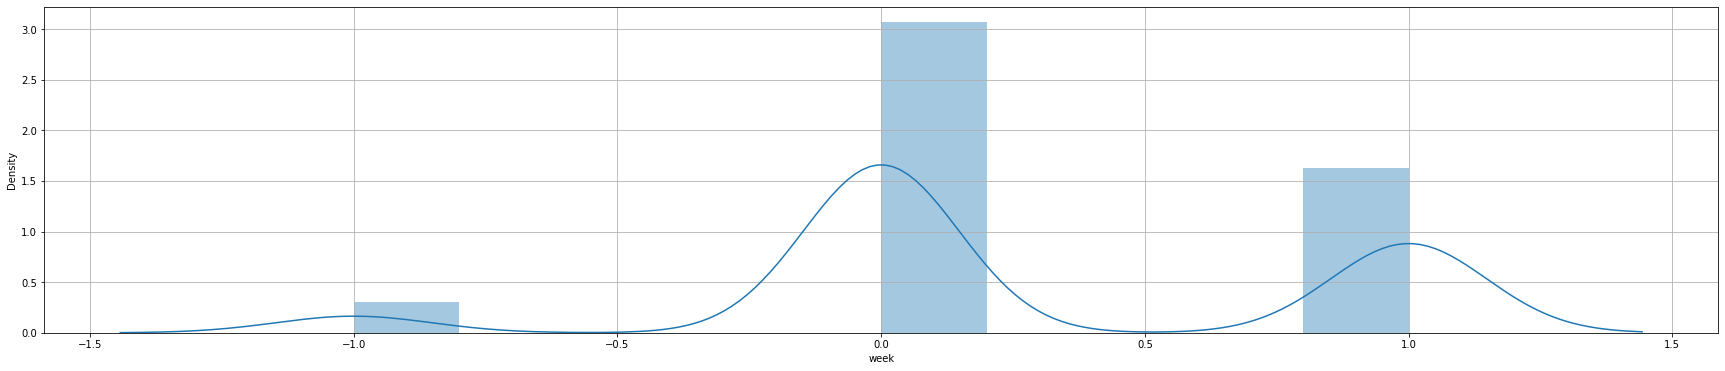

In [58]:
randomforest_random.best_params_
predictions=randomforest_random.predict(x_test)
sns.distplot(y_test-predictions)

In [59]:
print(confusion_matrix(y_test,predictions))

model_name.append("randomforest")

train_prediction=randomforest_random.predict(x_train)
test_prediction=randomforest_random.predict(x_test)

train_acc.append(float(accuracy_score(y_train,train_prediction)))
test_acc.append(float(accuracy_score(y_test,test_prediction)))

train_precision.append(float(precision_score(y_train,train_prediction)))
test_precision.append(float(precision_score(y_test,test_prediction)))

train_recall.append(float(recall_score(y_train,train_prediction)))
test_recall.append(float(recall_score(y_test,test_prediction)))

train_f1.append(float(f1_score(y_train,train_prediction)))
test_f1.append(float(f1_score(y_test,test_prediction)))


print("Accuracy: ",accuracy_score(y_test,predictions))
print("Precision Score : ",precision_score(y_test, predictions, pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_test, predictions, 
                                           pos_label='positive'
                                           ,average='micro'))
print('F1 score : ',f1_score(y_test, predictions, average='macro'))

[[405  49]
 [263  90]]
Accuracy:  0.6133828996282528
Precision Score :  0.6133828996282528
Recall Score :  0.6133828996282528
F1 score :  0.5438893961132125


In [60]:
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

model_name.append("MLP Classifier")

train_prediction=classifier.predict(x_train)
test_prediction=classifier.predict(x_test)

train_acc.append(float(accuracy_score(y_train,train_prediction)))
test_acc.append(float(accuracy_score(y_test,test_prediction)))

train_precision.append(float(precision_score(y_train,train_prediction)))
test_precision.append(float(precision_score(y_test,test_prediction)))

train_recall.append(float(recall_score(y_train,train_prediction)))
test_recall.append(float(recall_score(y_test,test_prediction)))

train_f1.append(float(f1_score(y_train,train_prediction)))
test_f1.append(float(f1_score(y_test,test_prediction)))

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))
print('F1 score : ',f1_score(y_test, y_pred, average='macro'))

Accuracy:  0.5985130111524164
Precision Score :  0.5985130111524164
Recall Score :  0.5985130111524164
F1 score :  0.5702366863905326


In [61]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)
preds_gbc = gbc.predict(x_test)


model_name.append("Gradient Boosting Classifier")

train_prediction=gbc.predict(x_train)
test_prediction=gbc.predict(x_test)

train_acc.append(float(accuracy_score(y_train,train_prediction)))
test_acc.append(float(accuracy_score(y_test,test_prediction)))

train_precision.append(float(precision_score(y_train,train_prediction)))
test_precision.append(float(precision_score(y_test,test_prediction)))

train_recall.append(float(recall_score(y_train,train_prediction)))
test_recall.append(float(recall_score(y_test,test_prediction)))

train_f1.append(float(f1_score(y_train,train_prediction)))
test_f1.append(float(f1_score(y_test,test_prediction)))


print(confusion_matrix(y_test,preds_gbc))

print("Accuracy: ",accuracy_score(y_test,preds_gbc))
print("Precision Score : ",precision_score(y_test, preds_gbc, pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_test, preds_gbc, 
                                           pos_label='positive'
                                           ,average='micro'))
print('F1 score : ',f1_score(y_test, preds_gbc, average='macro'))


# print(classification_report(y_test,preds_gbc))

[[351 103]
 [233 120]]
Accuracy:  0.5836431226765799
Precision Score :  0.5836431226765799
Recall Score :  0.5836431226765799
F1 score :  0.5464836223506744


In [62]:
results_without_oversampling = pd.DataFrame({"Model Name":model_name, "Train Accuracy":train_acc, "Test Accuracy":test_acc, "Train Precision":train_precision,
                                       "Test Precision":test_precision, "Train Recall":train_recall, "Test Recall":test_recall,
                                       "Trrain F1 scroe":train_f1, "Test F1 score":test_f1})


**Random Over Sampling**

In [63]:
model_name = []

train_acc = []
test_acc = []

train_precision = []
test_precision = []

train_recall = []
test_recall = []

train_f1 = []
test_f1 = []


In [64]:

#Random over sampling
from imblearn.over_sampling import RandomOverSampler

x = pd.DataFrame.copy(model_data)
x = x.drop(['week'], axis = 1)
y = model_data['week']
# print(x,y)
ros = RandomOverSampler()
x,y = ros.fit_resample(x,y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [65]:
y.value_counts()

0    1557
1    1557
Name: week, dtype: int64

In [66]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score,accuracy_score,fbeta_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))

sgd_a = sgd.fit(x_train,y_train)
prediction_sgd = sgd_a.predict(x_test)
print(confusion_matrix(y_test,prediction_sgd))

model_name.append("SGD Classifier")

train_prediction=sgd_a.predict(x_train)
test_prediction=sgd_a.predict(x_test)

train_acc.append(float(accuracy_score(y_train,train_prediction)))
test_acc.append(float(accuracy_score(y_test,test_prediction)))

train_precision.append(float(precision_score(y_train,train_prediction)))
test_precision.append(float(precision_score(y_test,test_prediction)))

train_recall.append(float(recall_score(y_train,train_prediction)))
test_recall.append(float(recall_score(y_test,test_prediction)))

train_f1.append(float(f1_score(y_train,train_prediction)))
test_f1.append(float(f1_score(y_test,test_prediction)))


print("Accuracy: ",accuracy_score(y_test,prediction_sgd))
print("Precision Score : ",precision_score(y_test, prediction_sgd, pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_test, prediction_sgd, 
                                           pos_label='positive'
                                           ,average='micro'))
print('F1 score : ',f1_score(y_test, prediction_sgd, average='macro'))

[[216 252]
 [215 252]]
Accuracy:  0.5005347593582887
Precision Score :  0.5005347593582887
Recall Score :  0.5005347593582887
F1 score :  0.49979322487854105


In [67]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)
preds_gbc = gbc.predict(x_test)


model_name.append("GradientBoostingClassifier")

train_prediction=gbc.predict(x_train)
test_prediction=gbc.predict(x_test)

train_acc.append(float(accuracy_score(y_train,train_prediction)))
test_acc.append(float(accuracy_score(y_test,test_prediction)))

train_precision.append(float(precision_score(y_train,train_prediction)))
test_precision.append(float(precision_score(y_test,test_prediction)))

train_recall.append(float(recall_score(y_train,train_prediction)))
test_recall.append(float(recall_score(y_test,test_prediction)))

train_f1.append(float(f1_score(y_train,train_prediction)))
test_f1.append(float(f1_score(y_test,test_prediction)))


print(confusion_matrix(y_test,preds_gbc))

print("Accuracy: ",accuracy_score(y_test,preds_gbc))
print("Precision Score : ",precision_score(y_test, preds_gbc, pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_test, preds_gbc, 
                                           pos_label='positive'
                                           ,average='micro'))
print('F1 score : ',f1_score(y_test, preds_gbc, average='macro'))


# print(classification_report(y_test,preds_gbc))

[[277 191]
 [203 264]]
Accuracy:  0.5786096256684492
Precision Score :  0.5786096256684492
Recall Score :  0.5786096256684492
F1 score :  0.5785281492261365


Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END max_depth=23, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   2.0s
[CV] END max_depth=23, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   2.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=17, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=17, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimato

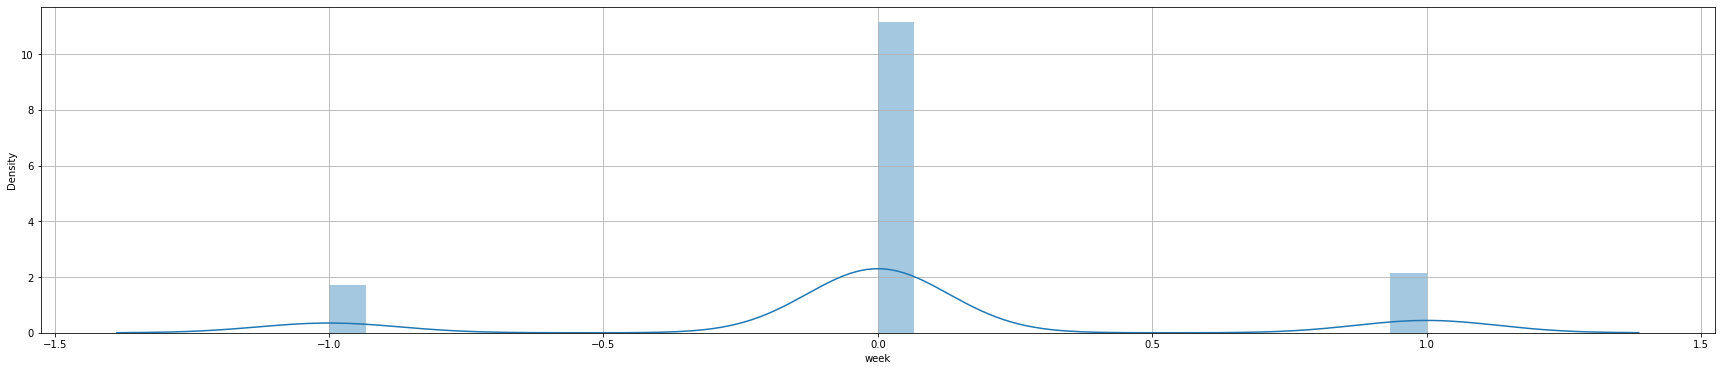

In [68]:
# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 5)]


# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
randomforest_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 2, verbose=2, random_state=30, n_jobs = 1)
randomforest_random.fit(x_train,y_train)


randomforest_random.best_params_

predictions=randomforest_random.predict(x_test)
sns.distplot(y_test-predictions)

model_name.append("Random Forest Classifier")

train_prediction=randomforest_random.predict(x_train)
test_prediction=randomforest_random.predict(x_test)

train_acc.append(float(accuracy_score(y_train,train_prediction)))
test_acc.append(float(accuracy_score(y_test,test_prediction)))

train_precision.append(float(precision_score(y_train,train_prediction)))
test_precision.append(float(precision_score(y_test,test_prediction)))

train_recall.append(float(recall_score(y_train,train_prediction)))
test_recall.append(float(recall_score(y_test,test_prediction)))

train_f1.append(float(f1_score(y_train,train_prediction)))
test_f1.append(float(f1_score(y_test,test_prediction)))

print(confusion_matrix(y_test,predictions))

print("Accuracy: ",accuracy_score(y_test,predictions))
print("Precision Score : ",precision_score(y_test, predictions, pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_test, predictions, 
                                           pos_label='positive'
                                           ,average='micro'))
print('F1 score : ',f1_score(y_test, predictions, average='macro'))

In [69]:
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier (MLP Multi layer perceptron) 
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

model_name.append("MLP Classifier")

train_prediction=classifier.predict(x_train)
test_prediction=classifier.predict(x_test)

train_acc.append(float(accuracy_score(y_train,train_prediction)))
test_acc.append(float(accuracy_score(y_test,test_prediction)))

train_precision.append(float(precision_score(y_train,train_prediction)))
test_precision.append(float(precision_score(y_test,test_prediction)))

train_recall.append(float(recall_score(y_train,train_prediction)))
test_recall.append(float(recall_score(y_test,test_prediction)))

train_f1.append(float(f1_score(y_train,train_prediction)))
test_f1.append(float(f1_score(y_test,test_prediction)))

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))
print('F1 score : ',f1_score(y_test, y_pred, average='macro'))

Accuracy:  0.6491978609625668
Precision Score :  0.6491978609625668
Recall Score :  0.6491978609625668
F1 score :  0.648985459473318


In [70]:
results_random_oversampling = pd.DataFrame({"Model Name":model_name, "Train Accuracy":train_acc, "Test Accuracy":test_acc, "Train Precision":train_precision,
                                       "Test Precision":test_precision, "Train Recall":train_recall, "Test Recall":test_recall,
                                       "Trrain F1 scroe":train_f1, "Test F1 score":test_f1})


Smote Over Sampling

In [71]:
model_name = []

train_acc = []
test_acc = []

train_precision = []
test_precision = []

train_recall = []
test_recall = []

train_f1 = []
test_f1 = []


In [72]:
#SMOTE Oversampling

# SPlitting data
from sklearn.model_selection import train_test_split
# from tensorflow.keras.utils import to_categorical

x = pd.DataFrame.copy(model_data)
x = x.drop(['week'], axis = 1)
y = model_data['week']
from imblearn.over_sampling import SMOTE
sm =  SMOTE()
x,y = sm.fit_resample(x,y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END max_depth=23, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   2.1s
[CV] END max_depth=23, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   2.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=17, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=17, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimato

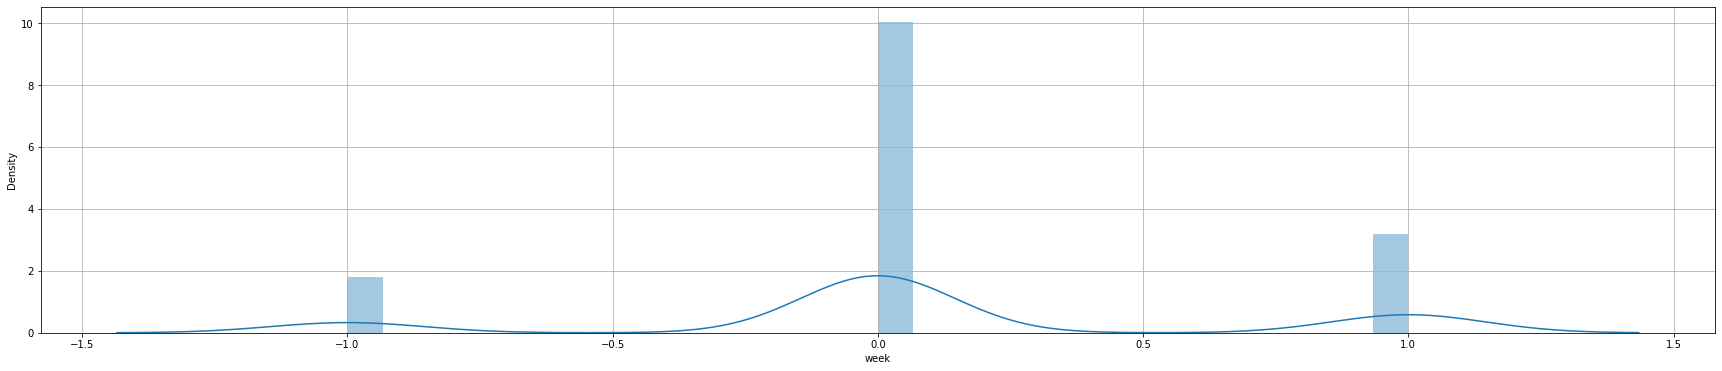

In [73]:
# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 5)]


# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
randomforest_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 2, verbose=2, random_state=30, n_jobs = 1)
randomforest_random.fit(x_train,y_train)


randomforest_random.best_params_

predictions=randomforest_random.predict(x_test)
sns.distplot(y_test-predictions)



model_name.append("Random Forest Classifier")

train_prediction=randomforest_random.predict(x_train)
test_prediction=randomforest_random.predict(x_test)

train_acc.append(float(accuracy_score(y_train,train_prediction)))
test_acc.append(float(accuracy_score(y_test,test_prediction)))

train_precision.append(float(precision_score(y_train,train_prediction)))
test_precision.append(float(precision_score(y_test,test_prediction)))

train_recall.append(float(recall_score(y_train,train_prediction)))
test_recall.append(float(recall_score(y_test,test_prediction)))

train_f1.append(float(f1_score(y_train,train_prediction)))
test_f1.append(float(f1_score(y_test,test_prediction)))

print(confusion_matrix(y_test,predictions))

print("Accuracy: ",accuracy_score(y_test,predictions))
print("Precision Score : ",precision_score(y_test, predictions, pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_test, predictions, 
                                           pos_label='positive'
                                           ,average='micro'))
print('F1 score : ',f1_score(y_test, predictions, average='macro'))

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)
preds_gbc = gbc.predict(x_test)


model_name.append("GradientBoostingClassifier")

train_prediction=gbc.predict(x_train)
test_prediction=gbc.predict(x_test)

train_acc.append(float(accuracy_score(y_train,train_prediction)))
test_acc.append(float(accuracy_score(y_test,test_prediction)))

train_precision.append(float(precision_score(y_train,train_prediction)))
test_precision.append(float(precision_score(y_test,test_prediction)))

train_recall.append(float(recall_score(y_train,train_prediction)))
test_recall.append(float(recall_score(y_test,test_prediction)))

train_f1.append(float(f1_score(y_train,train_prediction)))
test_f1.append(float(f1_score(y_test,test_prediction)))


print(confusion_matrix(y_test,preds_gbc))

print("Accuracy: ",accuracy_score(y_test,preds_gbc))
print("Precision Score : ",precision_score(y_test, preds_gbc, pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_test, preds_gbc, 
                                           pos_label='positive'
                                           ,average='micro'))
print('F1 score : ',f1_score(y_test, preds_gbc, average='macro'))


# print(classification_report(y_test,preds_gbc))

[[315 133]
 [188 299]]
Accuracy:  0.6566844919786097
Precision Score :  0.6566844919786097
Recall Score :  0.6566844919786097
F1 score :  0.656583929178266


In [75]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score,accuracy_score,fbeta_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))

sgd_a = sgd.fit(x_train,y_train)
prediction_sgd = sgd_a.predict(x_test)
print(confusion_matrix(y_test,prediction_sgd))

model_name.append("SGD Classifier")

train_prediction=sgd_a.predict(x_train)
test_prediction=sgd_a.predict(x_test)

train_acc.append(float(accuracy_score(y_train,train_prediction)))
test_acc.append(float(accuracy_score(y_test,test_prediction)))

train_precision.append(float(precision_score(y_train,train_prediction)))
test_precision.append(float(precision_score(y_test,test_prediction)))

train_recall.append(float(recall_score(y_train,train_prediction)))
test_recall.append(float(recall_score(y_test,test_prediction)))

train_f1.append(float(f1_score(y_train,train_prediction)))
test_f1.append(float(f1_score(y_test,test_prediction)))


print("Accuracy: ",accuracy_score(y_test,prediction_sgd))
print("Precision Score : ",precision_score(y_test, prediction_sgd, pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_test, prediction_sgd, 
                                           pos_label='positive'
                                           ,average='micro'))
print('F1 score : ',f1_score(y_test, prediction_sgd, average='macro'))

[[246 202]
 [232 255]]
Accuracy:  0.5358288770053476
Precision Score :  0.5358288770053476
Recall Score :  0.5358288770053476
F1 score :  0.5357858659442838


In [76]:
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

model_name.append("MLP Classifier")

train_prediction=classifier.predict(x_train)
test_prediction=classifier.predict(x_test)

train_acc.append(float(accuracy_score(y_train,train_prediction)))
test_acc.append(float(accuracy_score(y_test,test_prediction)))

train_precision.append(float(precision_score(y_train,train_prediction)))
test_precision.append(float(precision_score(y_test,test_prediction)))

train_recall.append(float(recall_score(y_train,train_prediction)))
test_recall.append(float(recall_score(y_test,test_prediction)))

train_f1.append(float(f1_score(y_train,train_prediction)))
test_f1.append(float(f1_score(y_test,test_prediction)))

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))
print('F1 score : ',f1_score(y_test, y_pred, average='macro'))

Accuracy:  0.6588235294117647
Precision Score :  0.6588235294117647
Recall Score :  0.6588235294117647
F1 score :  0.6587673224792668


In [77]:
results_smooth_oversampling = pd.DataFrame({"Model Name":model_name, "Train Accuracy":train_acc, "Test Accuracy":test_acc, "Train Precision":train_precision,
                                       "Test Precision":test_precision, "Train Recall":train_recall, "Test Recall":test_recall,
                                       "Trrain F1 scroe":train_f1, "Test F1 score":test_f1})


1. Results without oversampling
2. Results with random oversampling
3. Results with smooth oversampling



In [78]:
results_without_oversampling

,Model Name,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Trrain F1 scroe,Test F1 score
0,SGD Classifier,0.535106,0.536555,0.433653,0.467492,0.407979,0.427762,0.420424,0.446746
1,randomforest,0.884574,0.613383,0.992958,0.647482,0.725869,0.254958,0.838662,0.365854
2,MLP Classifier,0.917021,0.598513,0.972603,0.558704,0.822394,0.390935,0.891213,0.460000
3,Gradient Boosting Classifier,0.698404,0.583643,0.691606,0.538117,0.487773,0.339943,0.572075,0.416667


In [79]:
results_random_oversampling

,Model Name,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Trrain F1 scroe,Test F1 score
0,SGD Classifier,0.501147,0.500535,0.501283,0.500000,0.537615,0.539615,0.518814,0.519053
1,GradientBoostingClassifier,0.695732,0.578610,0.694977,0.580220,0.698165,0.565310,0.696568,0.572668
2,Random Forest Classifier,0.982561,0.743316,1.000000,0.758542,0.965138,0.713062,0.982260,0.735099
3,MLP Classifier,0.952272,0.649198,0.965094,0.641548,0.938532,0.674518,0.951628,0.657620


In [80]:
# SMOTE results
results_smooth_oversampling

,Model Name,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Trrain F1 scroe,Test F1 score
0,Random Forest Classifier,0.994493,0.668449,1.000000,0.720698,0.988785,0.593429,0.994361,0.650901
1,GradientBoostingClassifier,0.722809,0.656684,0.742204,0.692130,0.667290,0.613963,0.702756,0.650707
2,SGD Classifier,0.503901,0.535829,0.494865,0.557987,0.495327,0.523614,0.495096,0.540254
3,MLP Classifier,0.971547,0.658824,0.983685,0.682609,0.957944,0.644764,0.970644,0.663147


# **Plots**

# **Plots for model without oversampling**

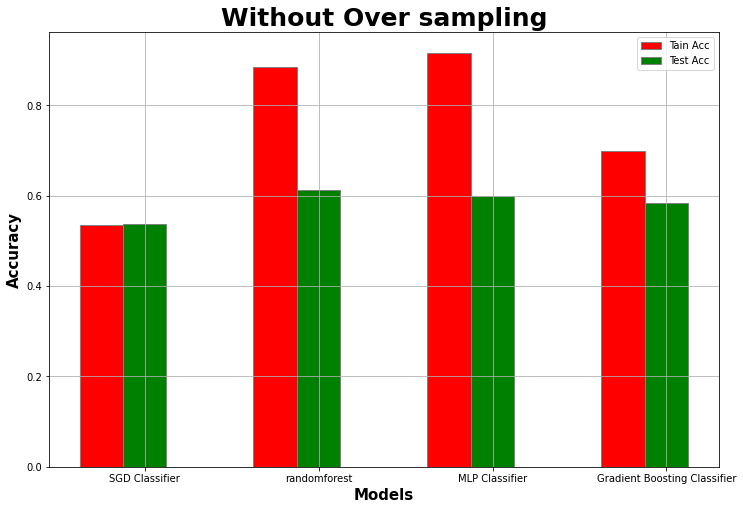

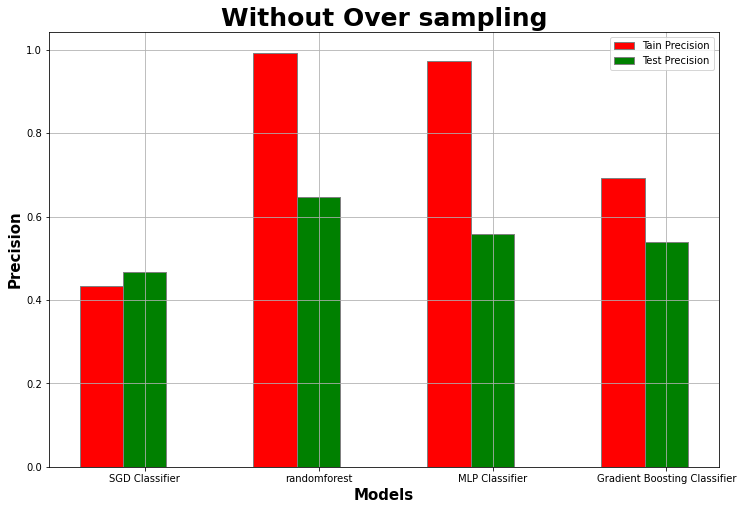

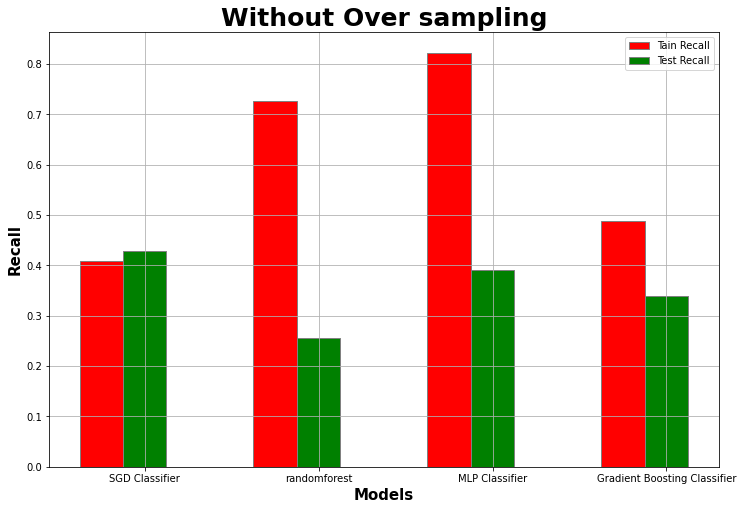

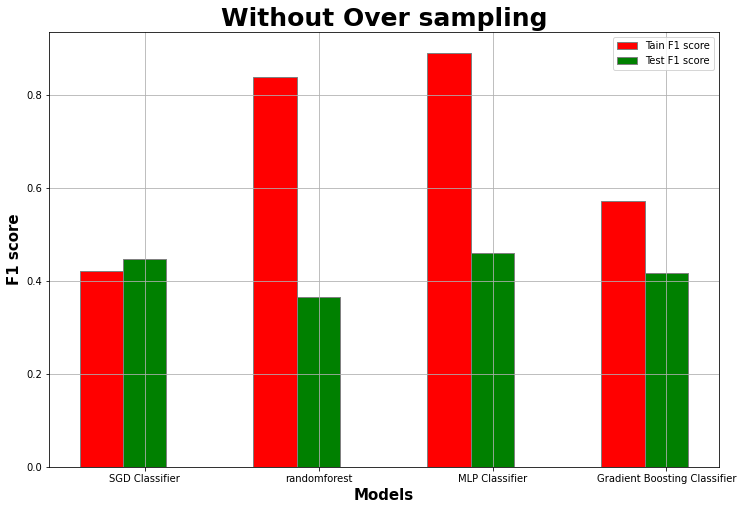

In [81]:
# Accuracy
train_acc = results_without_oversampling['Train Accuracy'].values
test_acc = results_without_oversampling['Test Accuracy'].values
m_name = results_without_oversampling['Model Name'].values

barWidth = 0.25

fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(train_acc))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, train_acc, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tain Acc')
plt.bar(br2, test_acc, color ='g', width = barWidth,
        edgecolor ='grey', label ='Test Acc')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(train_acc))], m_name)
plt.title('Without Over sampling',fontweight ='bold', fontsize = 25)
plt.legend()
plt.show()

# Precision

train_pre = results_without_oversampling['Train Precision'].values
test_pre = results_without_oversampling['Test Precision'].values

barWidth = 0.25

fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(train_acc))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, train_pre, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tain Precision')
plt.bar(br2, test_pre, color ='g', width = barWidth,
        edgecolor ='grey', label ='Test Precision')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Precision', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(train_acc))], m_name)
plt.title('Without Over sampling',fontweight ='bold', fontsize = 25)
plt.legend()
plt.show()

# Recall
train_r = results_without_oversampling['Train Recall'].values
test_r = results_without_oversampling['Test Recall'].values

barWidth = 0.25

fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(train_acc))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, train_r, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tain Recall')
plt.bar(br2, test_r, color ='g', width = barWidth,
        edgecolor ='grey', label ='Test Recall')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Recall', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(train_acc))], m_name)
plt.title('Without Over sampling',fontweight ='bold', fontsize = 25)
plt.legend()
plt.show()

# F1

train_f1 = results_without_oversampling['Trrain F1 scroe'].values
test_f1 = results_without_oversampling['Test F1 score'].values

barWidth = 0.25

fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(train_acc))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, train_f1, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tain F1 score')
plt.bar(br2, test_f1, color ='g', width = barWidth,
        edgecolor ='grey', label ='Test F1 score')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('F1 score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(train_acc))], m_name)
plt.title('Without Over sampling',fontweight ='bold', fontsize = 25)
plt.legend()
plt.show()

## **Plots for Results Random Oversampling**

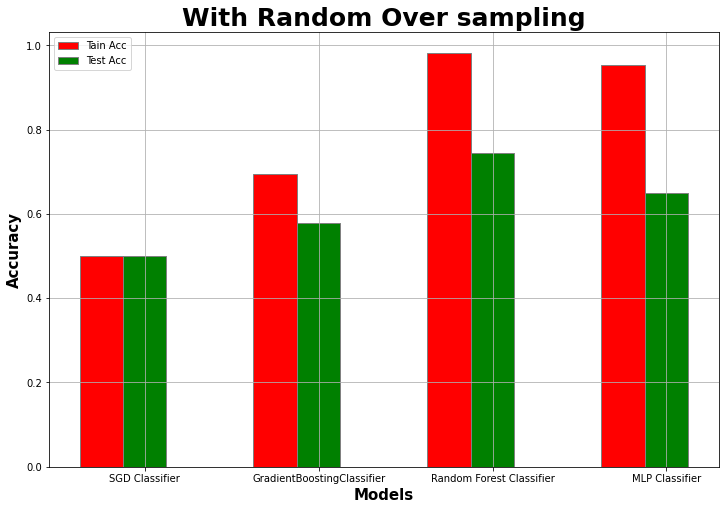

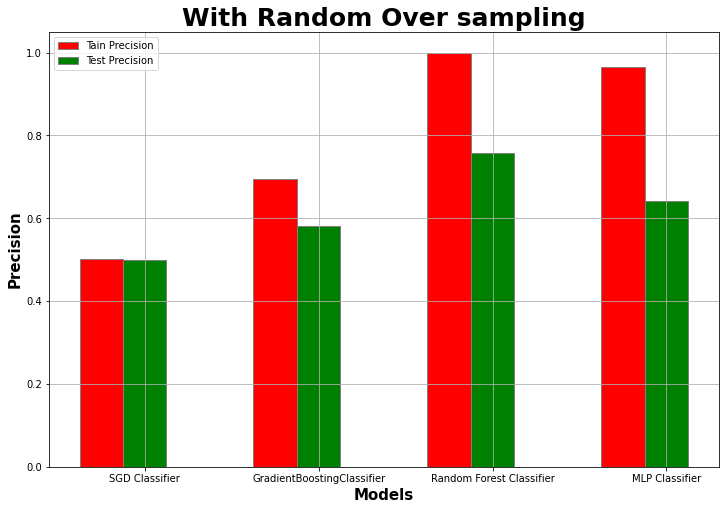

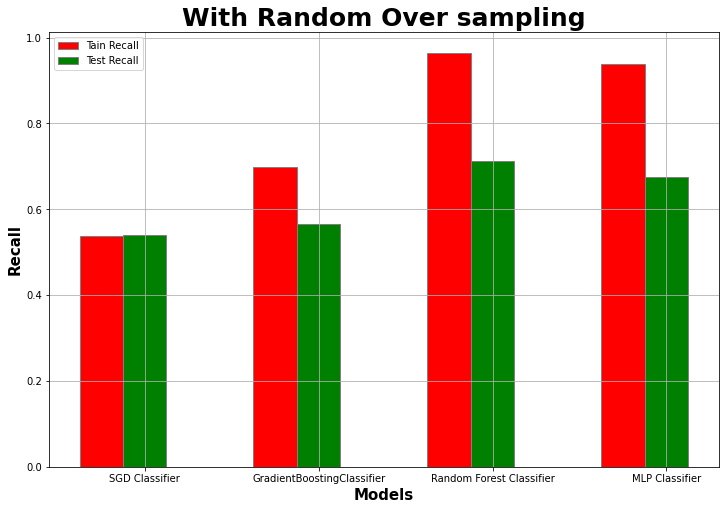

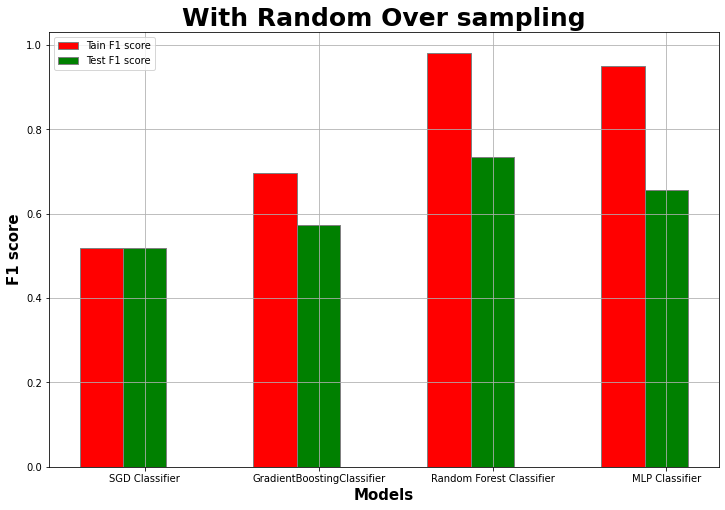

In [82]:
# Accuracy
train_acc = results_random_oversampling['Train Accuracy'].values
test_acc = results_random_oversampling['Test Accuracy'].values
m_name = results_random_oversampling['Model Name'].values

barWidth = 0.25

fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(train_acc))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, train_acc, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tain Acc')
plt.bar(br2, test_acc, color ='g', width = barWidth,
        edgecolor ='grey', label ='Test Acc')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(train_acc))], m_name)
plt.title('With Random Over sampling',fontweight ='bold', fontsize = 25)
plt.legend()
plt.show()

# Precision

train_pre = results_random_oversampling['Train Precision'].values
test_pre = results_random_oversampling['Test Precision'].values

barWidth = 0.25

fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(train_acc))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, train_pre, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tain Precision')
plt.bar(br2, test_pre, color ='g', width = barWidth,
        edgecolor ='grey', label ='Test Precision')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Precision', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(train_acc))], m_name)
plt.title('With Random Over sampling',fontweight ='bold', fontsize = 25)
plt.legend()
plt.show()

# Recall
train_r = results_random_oversampling['Train Recall'].values
test_r = results_random_oversampling['Test Recall'].values

barWidth = 0.25

fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(train_acc))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, train_r, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tain Recall')
plt.bar(br2, test_r, color ='g', width = barWidth,
        edgecolor ='grey', label ='Test Recall')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Recall', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(train_acc))], m_name)
plt.title('With Random Over sampling',fontweight ='bold', fontsize = 25)
plt.legend()
plt.show()

# F1

train_f1 = results_random_oversampling['Trrain F1 scroe'].values
test_f1 = results_random_oversampling['Test F1 score'].values

barWidth = 0.25

fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(train_acc))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, train_f1, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tain F1 score')
plt.bar(br2, test_f1, color ='g', width = barWidth,
        edgecolor ='grey', label ='Test F1 score')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('F1 score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(train_acc))], m_name)
plt.title('With Random Over sampling',fontweight ='bold', fontsize = 25)
plt.legend()
plt.show()

**Plots for Results On Results Smooth Oversampling **

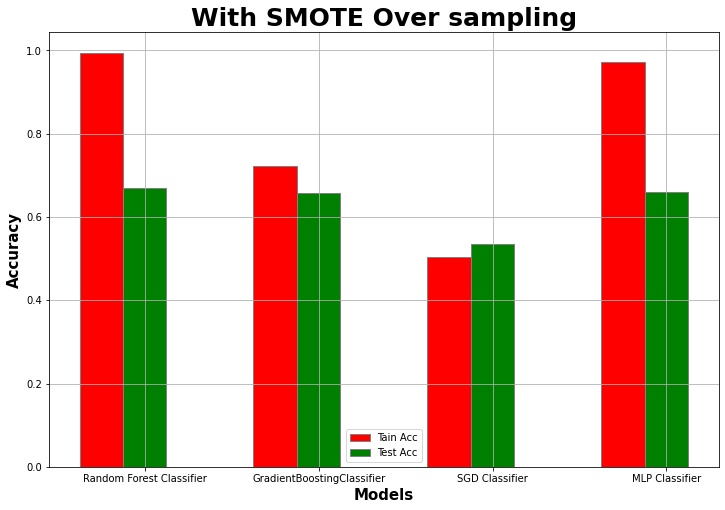

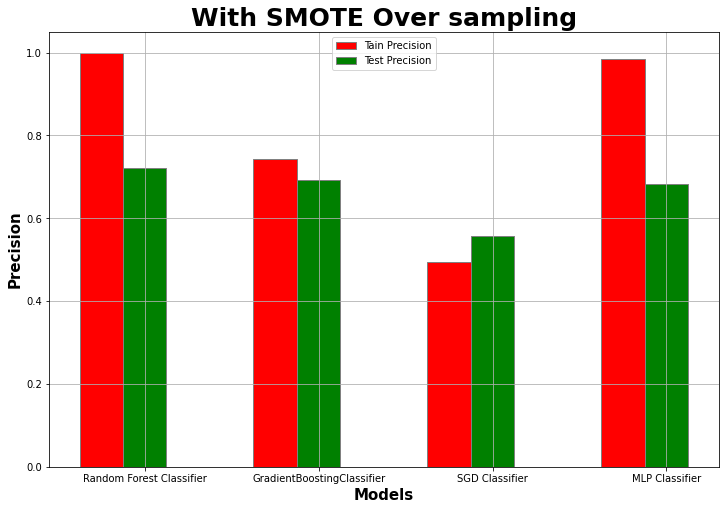

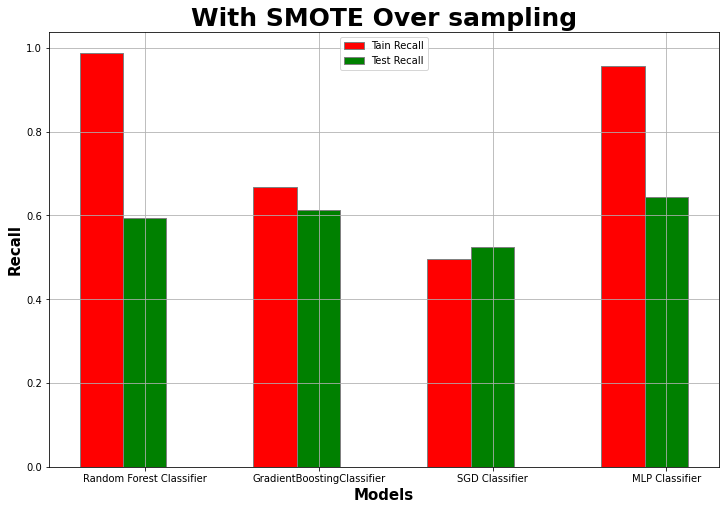

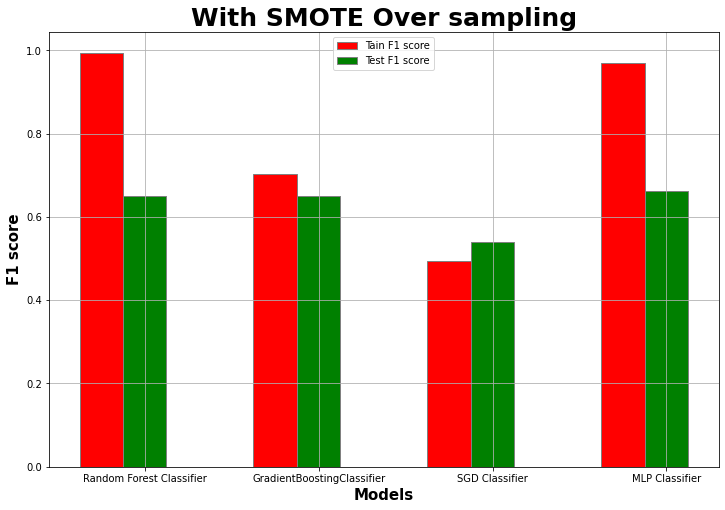

In [83]:
# Accuracy
train_acc = results_smooth_oversampling['Train Accuracy'].values
test_acc = results_smooth_oversampling['Test Accuracy'].values
m_name = results_smooth_oversampling['Model Name'].values

barWidth = 0.25

fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(train_acc))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, train_acc, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tain Acc')
plt.bar(br2, test_acc, color ='g', width = barWidth,
        edgecolor ='grey', label ='Test Acc')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(train_acc))], m_name)
plt.title('With SMOTE Over sampling',fontweight ='bold', fontsize = 25)
plt.legend()
plt.show()

# Precision

train_pre = results_smooth_oversampling['Train Precision'].values
test_pre = results_smooth_oversampling['Test Precision'].values

barWidth = 0.25

fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(train_acc))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, train_pre, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tain Precision')
plt.bar(br2, test_pre, color ='g', width = barWidth,
        edgecolor ='grey', label ='Test Precision')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Precision', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(train_acc))], m_name)
plt.title('With SMOTE Over sampling',fontweight ='bold', fontsize = 25)
plt.legend()
plt.show()

# Recall
train_r = results_smooth_oversampling['Train Recall'].values
test_r = results_smooth_oversampling['Test Recall'].values

barWidth = 0.25

fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(train_acc))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, train_r, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tain Recall')
plt.bar(br2, test_r, color ='g', width = barWidth,
        edgecolor ='grey', label ='Test Recall')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Recall', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(train_acc))], m_name)
plt.title('With SMOTE Over sampling',fontweight ='bold', fontsize = 25)
plt.legend()
plt.show()

# F1

train_f1 = results_smooth_oversampling['Trrain F1 scroe'].values
test_f1 = results_smooth_oversampling['Test F1 score'].values

barWidth = 0.25

fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(train_acc))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, train_f1, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tain F1 score')
plt.bar(br2, test_f1, color ='g', width = barWidth,
        edgecolor ='grey', label ='Test F1 score')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('F1 score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(train_acc))], m_name)
plt.title('With SMOTE Over sampling',fontweight ='bold', fontsize = 25)
plt.legend()
plt.show()